## 0. Pytorch的GPU验证与选择

In [1]:
# 验证GPU
import torch

torch.cuda.is_available()

True

In [2]:
# 选择对应的显卡
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# os.environ['CUDA_VISIBLE_DEVICES'] = '0,3'

## 1. Pytorch模板（Linear）
* 数据处理
* 模型设计
* 损失函数和优化器
* 训练（forward,backward,update）

In [3]:
import torch

# 数据加载或预处理
x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])
x_test=torch.Tensor([[4.0]])  # tensor([[],[],[]])，首先是Tensor()，其次是3*1的数据，每个数据是[],3个就需要[[],[].[]]

In [4]:
# 定义模型
class LinearModel(torch.nn.Module):  # Module可以自行反向传播，请注意！
    def __init__(self):
        super(LinearModel,self).__init__()  # 固定模式
        self.linear=torch.nn.Linear(1,1)  # 构造Linear(输入维度，输出维度，bias=True), y=Ax+b
        
    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
    
model=LinearModel()

In [5]:
# 损失函数和优化器
criterion=torch.nn.MSELoss(size_average=False)  # size_average表示损失值是否求平均
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)  # linear y=Ax+b有两个参数w和b，这里告诉有这两个参数进行随机梯度下降，学习率lr=0.01

E:\anaconda\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [6]:
# 训练过程
for epoch in range(1000):
    y_pred=model(x_data)  # 前馈计算y_pred
    loss=criterion(y_pred,y_data)  # 计算损失
    print(epoch,loss)
    
    optimizer.zero_grad()  # 梯度归零
    loss.backward()  # 反向传播
    optimizer.step()  # 更新

0 tensor(29.1354, grad_fn=<MseLossBackward>)
1 tensor(13.3518, grad_fn=<MseLossBackward>)
2 tensor(6.3199, grad_fn=<MseLossBackward>)
3 tensor(3.1841, grad_fn=<MseLossBackward>)
4 tensor(1.7828, grad_fn=<MseLossBackward>)
5 tensor(1.1537, grad_fn=<MseLossBackward>)
6 tensor(0.8685, grad_fn=<MseLossBackward>)
7 tensor(0.7364, grad_fn=<MseLossBackward>)
8 tensor(0.6726, grad_fn=<MseLossBackward>)
9 tensor(0.6392, grad_fn=<MseLossBackward>)
10 tensor(0.6195, grad_fn=<MseLossBackward>)
11 tensor(0.6059, grad_fn=<MseLossBackward>)
12 tensor(0.5951, grad_fn=<MseLossBackward>)
13 tensor(0.5856, grad_fn=<MseLossBackward>)
14 tensor(0.5768, grad_fn=<MseLossBackward>)
15 tensor(0.5683, grad_fn=<MseLossBackward>)
16 tensor(0.5601, grad_fn=<MseLossBackward>)
17 tensor(0.5520, grad_fn=<MseLossBackward>)
18 tensor(0.5440, grad_fn=<MseLossBackward>)
19 tensor(0.5362, grad_fn=<MseLossBackward>)
20 tensor(0.5285, grad_fn=<MseLossBackward>)
21 tensor(0.5209, grad_fn=<MseLossBackward>)
22 tensor(0.5134, 

300 tensor(0.0092, grad_fn=<MseLossBackward>)
301 tensor(0.0090, grad_fn=<MseLossBackward>)
302 tensor(0.0089, grad_fn=<MseLossBackward>)
303 tensor(0.0088, grad_fn=<MseLossBackward>)
304 tensor(0.0087, grad_fn=<MseLossBackward>)
305 tensor(0.0085, grad_fn=<MseLossBackward>)
306 tensor(0.0084, grad_fn=<MseLossBackward>)
307 tensor(0.0083, grad_fn=<MseLossBackward>)
308 tensor(0.0082, grad_fn=<MseLossBackward>)
309 tensor(0.0081, grad_fn=<MseLossBackward>)
310 tensor(0.0079, grad_fn=<MseLossBackward>)
311 tensor(0.0078, grad_fn=<MseLossBackward>)
312 tensor(0.0077, grad_fn=<MseLossBackward>)
313 tensor(0.0076, grad_fn=<MseLossBackward>)
314 tensor(0.0075, grad_fn=<MseLossBackward>)
315 tensor(0.0074, grad_fn=<MseLossBackward>)
316 tensor(0.0073, grad_fn=<MseLossBackward>)
317 tensor(0.0072, grad_fn=<MseLossBackward>)
318 tensor(0.0071, grad_fn=<MseLossBackward>)
319 tensor(0.0070, grad_fn=<MseLossBackward>)
320 tensor(0.0069, grad_fn=<MseLossBackward>)
321 tensor(0.0068, grad_fn=<MseLos

644 tensor(6.3109e-05, grad_fn=<MseLossBackward>)
645 tensor(6.2204e-05, grad_fn=<MseLossBackward>)
646 tensor(6.1307e-05, grad_fn=<MseLossBackward>)
647 tensor(6.0425e-05, grad_fn=<MseLossBackward>)
648 tensor(5.9557e-05, grad_fn=<MseLossBackward>)
649 tensor(5.8705e-05, grad_fn=<MseLossBackward>)
650 tensor(5.7860e-05, grad_fn=<MseLossBackward>)
651 tensor(5.7026e-05, grad_fn=<MseLossBackward>)
652 tensor(5.6209e-05, grad_fn=<MseLossBackward>)
653 tensor(5.5401e-05, grad_fn=<MseLossBackward>)
654 tensor(5.4604e-05, grad_fn=<MseLossBackward>)
655 tensor(5.3821e-05, grad_fn=<MseLossBackward>)
656 tensor(5.3046e-05, grad_fn=<MseLossBackward>)
657 tensor(5.2283e-05, grad_fn=<MseLossBackward>)
658 tensor(5.1531e-05, grad_fn=<MseLossBackward>)
659 tensor(5.0792e-05, grad_fn=<MseLossBackward>)
660 tensor(5.0063e-05, grad_fn=<MseLossBackward>)
661 tensor(4.9344e-05, grad_fn=<MseLossBackward>)
662 tensor(4.8635e-05, grad_fn=<MseLossBackward>)
663 tensor(4.7935e-05, grad_fn=<MseLossBackward>)


989 tensor(4.2757e-07, grad_fn=<MseLossBackward>)
990 tensor(4.2162e-07, grad_fn=<MseLossBackward>)
991 tensor(4.1553e-07, grad_fn=<MseLossBackward>)
992 tensor(4.0933e-07, grad_fn=<MseLossBackward>)
993 tensor(4.0351e-07, grad_fn=<MseLossBackward>)
994 tensor(3.9780e-07, grad_fn=<MseLossBackward>)
995 tensor(3.9207e-07, grad_fn=<MseLossBackward>)
996 tensor(3.8662e-07, grad_fn=<MseLossBackward>)
997 tensor(3.8093e-07, grad_fn=<MseLossBackward>)
998 tensor(3.7528e-07, grad_fn=<MseLossBackward>)
999 tensor(3.6996e-07, grad_fn=<MseLossBackward>)


In [7]:
# 输出

# weight & bias
print('w=',model.linear.weight.item())  # item的原因是model.linear.weight是一个[[]]矩阵
print('b=',model.linear.bias.item())

# Test Model
# x_test=torch.Tensor([[4.0]])
y_test=model(x_test)
print('y_pred=',y_test.data)

w= 1.999595046043396
b= 0.0009204953094013035
y_pred= tensor([[7.9993]])


## 2. Logistics（回归）
* sigmoid
* cross-entropy

## 2.1 低维度（模板）

In [8]:
import torch
import torchvision
import torch.nn.functional as F

x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[0],[0],[1]])

In [9]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)
        
    def forward(self,x):
        y_pred=F.sigmoid(self.linear(x))
        return y_pred
    
model=LogisticRegressionModel()

In [10]:
criterion=torch.nn.BCELoss(size_average=False)  # binary cross-entropy
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [11]:
for epoch in range(1000):
    y_pred=model(x_data)
    print(y_pred)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

E:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.1777],
        [0.0842],
        [0.0377]], grad_fn=<SigmoidBackward>)
0 3.5629847049713135
tensor([[0.1825],
        [0.0888],
        [0.0408]], grad_fn=<SigmoidBackward>)
1 3.493852138519287
tensor([[0.1873],
        [0.0935],
        [0.0441]], grad_fn=<SigmoidBackward>)
2 3.4260833263397217
tensor([[0.1922],
        [0.0984],
        [0.0477]], grad_fn=<SigmoidBackward>)
3 3.3597218990325928
tensor([[0.1971],
        [0.1035],
        [0.0515]], grad_fn=<SigmoidBackward>)
4 3.2948098182678223
tensor([[0.2020],
        [0.1088],
        [0.0555]], grad_fn=<SigmoidBackward>)
5 3.2313873767852783
tensor([[0.2070],
        [0.1142],
        [0.0598]], grad_fn=<SigmoidBackward>)
6 3.1694936752319336
tensor([[0.2120],
        [0.1197],
        [0.0643]], grad_fn=<SigmoidBackward>)
7 3.1091654300689697
tensor([[0.2169],
        [0.1254],
        [0.0691]], grad_fn=<SigmoidBackward>)
8 3.0504367351531982
tensor([[0.2219],
        [0.1313],
        [0.0742]], grad_fn=<SigmoidBac

tensor([[0.3113],
        [0.4329],
        [0.5632]], grad_fn=<SigmoidBackward>)
301 1.5143678188323975
tensor([[0.3109],
        [0.4328],
        [0.5634]], grad_fn=<SigmoidBackward>)
302 1.5132455825805664
tensor([[0.3106],
        [0.4327],
        [0.5636]], grad_fn=<SigmoidBackward>)
303 1.5121252536773682
tensor([[0.3102],
        [0.4326],
        [0.5638]], grad_fn=<SigmoidBackward>)
304 1.5110065937042236
tensor([[0.3098],
        [0.4325],
        [0.5641]], grad_fn=<SigmoidBackward>)
305 1.5098896026611328
tensor([[0.3094],
        [0.4324],
        [0.5643]], grad_fn=<SigmoidBackward>)
306 1.5087746381759644
tensor([[0.3091],
        [0.4323],
        [0.5645]], grad_fn=<SigmoidBackward>)
307 1.50766122341156
tensor([[0.3087],
        [0.4322],
        [0.5648]], grad_fn=<SigmoidBackward>)
308 1.5065499544143677
tensor([[0.3083],
        [0.4321],
        [0.5650]], grad_fn=<SigmoidBackward>)
309 1.5054399967193604
tensor([[0.3080],
        [0.4320],
        [0.5652]], gr

tensor([[0.2186],
        [0.4045],
        [0.6225]], grad_fn=<SigmoidBackward>)
608 1.238999843597412
tensor([[0.2184],
        [0.4044],
        [0.6227]], grad_fn=<SigmoidBackward>)
609 1.2382868528366089
tensor([[0.2181],
        [0.4043],
        [0.6228]], grad_fn=<SigmoidBackward>)
610 1.237574815750122
tensor([[0.2179],
        [0.4042],
        [0.6230]], grad_fn=<SigmoidBackward>)
611 1.2368637323379517
tensor([[0.2176],
        [0.4041],
        [0.6232]], grad_fn=<SigmoidBackward>)
612 1.2361538410186768
tensor([[0.2174],
        [0.4041],
        [0.6233]], grad_fn=<SigmoidBackward>)
613 1.2354445457458496
tensor([[0.2172],
        [0.4040],
        [0.6235]], grad_fn=<SigmoidBackward>)
614 1.234736442565918
tensor([[0.2169],
        [0.4039],
        [0.6236]], grad_fn=<SigmoidBackward>)
615 1.2340290546417236
tensor([[0.2167],
        [0.4038],
        [0.6238]], grad_fn=<SigmoidBackward>)
616 1.2333228588104248
tensor([[0.2165],
        [0.4037],
        [0.6240]], gra

tensor([[0.1567],
        [0.3788],
        [0.6668]], grad_fn=<SigmoidBackward>)
927 1.0518674850463867
tensor([[0.1566],
        [0.3788],
        [0.6669]], grad_fn=<SigmoidBackward>)
928 1.0513854026794434
tensor([[0.1564],
        [0.3787],
        [0.6670]], grad_fn=<SigmoidBackward>)
929 1.0509040355682373
tensor([[0.1563],
        [0.3786],
        [0.6672]], grad_fn=<SigmoidBackward>)
930 1.0504230260849
tensor([[0.1561],
        [0.3785],
        [0.6673]], grad_fn=<SigmoidBackward>)
931 1.0499428510665894
tensor([[0.1560],
        [0.3785],
        [0.6674]], grad_fn=<SigmoidBackward>)
932 1.049462914466858
tensor([[0.1558],
        [0.3784],
        [0.6675]], grad_fn=<SigmoidBackward>)
933 1.0489835739135742
tensor([[0.1556],
        [0.3783],
        [0.6676]], grad_fn=<SigmoidBackward>)
934 1.0485049486160278
tensor([[0.1555],
        [0.3782],
        [0.6677]], grad_fn=<SigmoidBackward>)
935 1.04802668094635
tensor([[0.1553],
        [0.3782],
        [0.6679]], grad_f

In [12]:
x_test=torch.Tensor([[2.5]])
x_pred=model(x_test)

print(x_pred)

tensor([[0.5267]], grad_fn=<SigmoidBackward>)


E:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


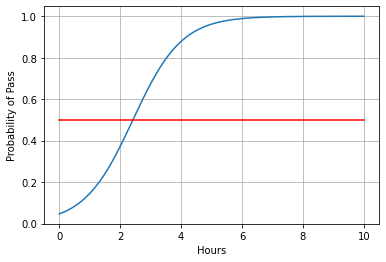

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,10,200)  # 采样200个数[0,10]
x_t=torch.Tensor(x).view(200,1)  # 相当于numpy的reshape
y_t=model(x_t)
y=y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

## 2.2 高维度（模板）

In [14]:
import torch
import numpy as np

xy=np.loadtxt('./data/StartData/diabetes/diabetes.csv.gz',delimiter=',',dtype=np.float32)
x_data=torch.from_numpy(xy[:,:-1])
y_data=torch.from_numpy(xy[:,[-1]])

In [15]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1=torch.nn.Linear(8,6)
        self.linear2=torch.nn.Linear(6,4)
        self.linear3=torch.nn.Linear(4,1)
        self.relu=torch.nn.ReLU()
        self.sigmoid=torch.nn.Sigmoid()
        
    def forward(self,x):
        x=self.relu(self.linear1(x))
        x=self.relu(self.linear2(x))
        x=self.sigmoid(self.linear3(x))
        return x
    
model=Model()

In [16]:
criterion=torch.nn.BCELoss(size_average=True)
optimizer=torch.optim.SGD(model.parameters(),lr=1)

E:\anaconda\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [17]:
for epoch in range(100):
    y_pred=model(x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.6872345209121704
1 0.6662502288818359
2 0.6557571887969971
3 0.6497277021408081
4 0.6459881067276001
5 0.643433690071106
6 0.641542911529541
7 0.6399015188217163
8 0.6383581757545471
9 0.6368404030799866
10 0.6351959705352783
11 0.6333920359611511
12 0.6314079165458679
13 0.6292098760604858
14 0.62674480676651
15 0.6239343285560608
16 0.6207482218742371
17 0.6171582937240601
18 0.6130332946777344
19 0.6083325147628784
20 0.603041410446167
21 0.5971282720565796
22 0.590569794178009
23 0.5834347009658813
24 0.5757949352264404
25 0.56780606508255
26 0.5596628189086914
27 0.5515061020851135
28 0.5436047315597534
29 0.536132276058197
30 0.5291939973831177
31 0.5228421688079834
32 0.5171618461608887
33 0.5122308731079102
34 0.5080479979515076
35 0.5049404501914978
36 0.5037295818328857
37 0.5061729550361633
38 0.5193232297897339
39 0.5418829917907715
40 0.6242311000823975
41 0.5115662217140198
42 0.5269491672515869
43 0.5214104652404785
44 0.5507493615150452
45 0.5209819674491882
46 0.54

## 3. 加载数据集
* Dataset
* DataLoader

注：
* Epoch:所有样本都进行一次前向传播和反向传播，称为一个epoch
* Batch-Size:在一次正向反向传播中的样本数量
* Iteration:batch size的数量，Iteration=(all sample)/Batch-Size

例如，样本10000个，每个batch-size有1000个，iteration就是10个，其中epoch自行设定

In [18]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        xy=np.loadtxt(filepath,delimiter=',',dtype=np.float32)
        self.len=xy.shape[0]
        self.x_data=torch.from_numpy(xy[:,:-1])
        self.y_data=torch.from_numpy(xy[:,[-1]])
        
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]  # 如果是图像数据集过大，可以将加载数据功能移至此处
    
    def __len__(self):
        return self.len
    
dataset=DiabetesDataset('./data/StartData/diabetes/diabetes.csv.gz')
train_loader=DataLoader(dataset=dataset,batch_size=32,shuffle=True)
# train_loader=DataLoader(dataset=dataset,batch_size=32,shuffle=True,num_workers=2)

In [19]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1=torch.nn.Linear(8,6)
        self.linear2=torch.nn.Linear(6,4)
        self.linear3=torch.nn.Linear(4,1)
        self.relu=torch.nn.ReLU()
        self.sigmoid=torch.nn.Sigmoid()
        
    def forward(self,x):
        x=self.relu(self.linear1(x))
        x=self.relu(self.linear2(x))
        x=self.sigmoid(self.linear3(x))
        return x
    
model=Model()

In [20]:
criterion=torch.nn.BCELoss(size_average=True)
optimizer=torch.optim.SGD(model.parameters(),lr=1)

In [21]:
if __name__ == '__main__':
    for epoch in range(100):
        for i,data in enumerate(train_loader,0):
            # prepare data
            inputs,labels=data
            # forward
            y_pred=model(inputs)
            loss=criterion(y_pred,labels)
            print(epoch,loss.item())

            # backward
            optimizer.zero_grad()
            loss.backward()
            # update
            optimizer.step()

0 0.6389917731285095
0 0.6747034192085266
0 0.6586979031562805
0 0.7169633507728577
0 0.6410226821899414
0 0.6573906540870667
0 0.6408417224884033
0 0.5897566080093384
0 0.5044044256210327
0 0.7368379831314087
0 0.6343632936477661
0 0.6267567873001099
0 0.6767482757568359
0 0.5603954195976257
0 0.6291481852531433
0 0.6864125728607178
0 0.633833110332489
0 0.5770507454872131
0 0.6187026500701904
0 0.5443772077560425
0 0.6714074015617371
0 0.5670968890190125
0 0.5912685990333557
0 0.49510639905929565
1 0.5284725427627563
1 0.49358928203582764
1 0.6101478934288025
1 0.6327682733535767
1 0.46497711539268494
1 0.5296054482460022
1 0.5793907642364502
1 0.572059154510498
1 0.6102390885353088
1 0.5360295176506042
1 0.5102447271347046
1 0.4031035900115967
1 0.6100598573684692
1 0.6490564346313477
1 0.5343676805496216
1 0.5223814249038696
1 0.556347668170929
1 0.4941856563091278
1 0.43664073944091797
1 0.48720628023147583
1 0.5047033429145813
1 0.4852418303489685
1 0.6204862594604492
1 0.5006353

18 0.45484018325805664
18 0.42839372158050537
18 0.3264732360839844
18 0.706128716468811
18 0.578179657459259
18 0.4977951645851135
18 0.3871583938598633
18 0.39919987320899963
18 0.4045419692993164
18 0.5235456228256226
18 0.4022219181060791
18 0.370221883058548
19 0.5045625567436218
19 0.29179462790489197
19 0.37485477328300476
19 0.6297672986984253
19 0.49881502985954285
19 0.5550664067268372
19 0.447330504655838
19 0.40684378147125244
19 0.6175885796546936
19 0.460837185382843
19 0.30359694361686707
19 0.35779428482055664
19 0.4222428798675537
19 0.36855626106262207
19 0.45320460200309753
19 0.5848186612129211
19 0.4563639163970947
19 0.5310485363006592
19 0.5553372502326965
19 0.4437521994113922
19 0.3721221089363098
19 0.311815470457077
19 0.4609537422657013
19 0.6718078255653381
20 0.5931124091148376
20 0.35679590702056885
20 0.5574001669883728
20 0.33118531107902527
20 0.5234472751617432
20 0.4375413656234741
20 0.5733375549316406
20 0.5154852867126465
20 0.39526647329330444
20

38 0.31810328364372253
38 0.2662862539291382
38 0.47623133659362793
38 0.35305356979370117
38 0.4258978068828583
38 0.39241209626197815
39 0.6140618324279785
39 0.27072304487228394
39 0.5229967832565308
39 0.6275292038917542
39 0.412442684173584
39 0.3139541447162628
39 0.3586670160293579
39 0.4419494569301605
39 0.35559046268463135
39 0.34547480940818787
39 0.3254663348197937
39 0.6417439579963684
39 0.5033083558082581
39 0.3462892472743988
39 0.34819337725639343
39 0.42143043875694275
39 0.5482943654060364
39 0.3661770522594452
39 0.5732227563858032
39 0.4163176119327545
39 0.5379215478897095
39 0.5585364699363708
39 0.409786194562912
39 0.450303316116333
40 0.49791276454925537
40 0.4917604923248291
40 0.5117065906524658
40 0.44552257657051086
40 0.4640854597091675
40 0.5028585195541382
40 0.48047110438346863
40 0.43081486225128174
40 0.4191063940525055
40 0.3806098997592926
40 0.5068163275718689
40 0.33023548126220703
40 0.34601259231567383
40 0.39518705010414124
40 0.38701915740966

58 0.44434720277786255
58 0.4643420875072479
58 0.5121475458145142
58 0.3728261888027191
58 0.44588327407836914
58 0.3978092670440674
58 0.8432932496070862
59 0.4675990045070648
59 0.40180808305740356
59 0.46769973635673523
59 0.2993102967739105
59 0.5880191922187805
59 0.4981805384159088
59 0.6026235222816467
59 0.3591966927051544
59 0.3331606388092041
59 0.26603031158447266
59 0.4669329524040222
59 0.4841878414154053
59 0.5880601406097412
59 0.6508365273475647
59 0.5145621299743652
59 0.28033316135406494
59 0.5177755355834961
59 0.46387577056884766
59 0.46216103434562683
59 0.4988820552825928
59 0.4645232558250427
59 0.4365556240081787
59 0.4000767469406128
59 0.37784281373023987
60 0.444013774394989
60 0.4291442334651947
60 0.414771169424057
60 0.474536657333374
60 0.3979661166667938
60 0.4542716145515442
60 0.5781698822975159
60 0.6084288954734802
60 0.39109015464782715
60 0.3759346008300781
60 0.3944551646709442
60 0.43275004625320435
60 0.3702080249786377
60 0.466752290725708
60 

78 0.3252931833267212
78 0.3199276924133301
78 0.33080899715423584
78 0.6224331855773926
78 0.407493531703949
78 0.4702776074409485
78 0.5576406717300415
78 0.3294568359851837
78 0.5249838829040527
78 0.4757634997367859
78 0.23015762865543365
78 0.30557164549827576
78 0.36340105533599854
78 0.5918595194816589
78 0.5944189429283142
78 0.4599502682685852
78 0.46010109782218933
78 0.5033257007598877
78 0.4500066637992859
78 0.42369163036346436
78 0.5831056237220764
78 0.38392388820648193
78 0.442842036485672
79 0.5145118832588196
79 0.5347785353660583
79 0.46029168367385864
79 0.40343335270881653
79 0.37462955713272095
79 0.4890648424625397
79 0.3741092085838318
79 0.28377145528793335
79 0.31120315194129944
79 0.37163272500038147
79 0.4011387228965759
79 0.37861254811286926
79 0.5746592283248901
79 0.4644816517829895
79 0.4123627245426178
79 0.33456671237945557
79 0.48105740547180176
79 0.41655802726745605
79 0.36634865403175354
79 0.3742654025554657
79 0.6089024543762207
79 0.47291448712

97 0.5770182609558105
97 0.4738943576812744
97 0.5665411353111267
97 0.5924506187438965
97 0.416104793548584
97 0.4754028618335724
97 0.39282381534576416
97 0.3925771117210388
97 0.32835322618484497
97 0.35107433795928955
97 0.35648760199546814
97 0.5360782146453857
97 0.3678332269191742
97 0.31304407119750977
97 0.7880050539970398
97 0.42288345098495483
97 0.4716819226741791
97 0.4697239100933075
98 0.39465805888175964
98 0.5123594403266907
98 0.39554864168167114
98 0.40517911314964294
98 0.4036247432231903
98 0.3745061457157135
98 0.6377743482589722
98 0.38658446073532104
98 0.4294503331184387
98 0.4411161243915558
98 0.3818102180957794
98 0.6028011441230774
98 0.46054181456565857
98 0.5336971282958984
98 0.4473162889480591
98 0.4267835319042206
98 0.2873184084892273
98 0.34790661931037903
98 0.5058587193489075
98 0.3481191098690033
98 0.4782911241054535
98 0.49107626080513
98 0.4438236951828003
98 0.411467969417572
99 0.33459264039993286
99 0.295348584651947
99 0.3555052876472473
99

## 3. 多分类问题
* Softmax Classifier

注：torch.nn.CrossEntropyLoss()包含softmax和loss，因此最后一层不需要激活函数（此时y是longTensor）
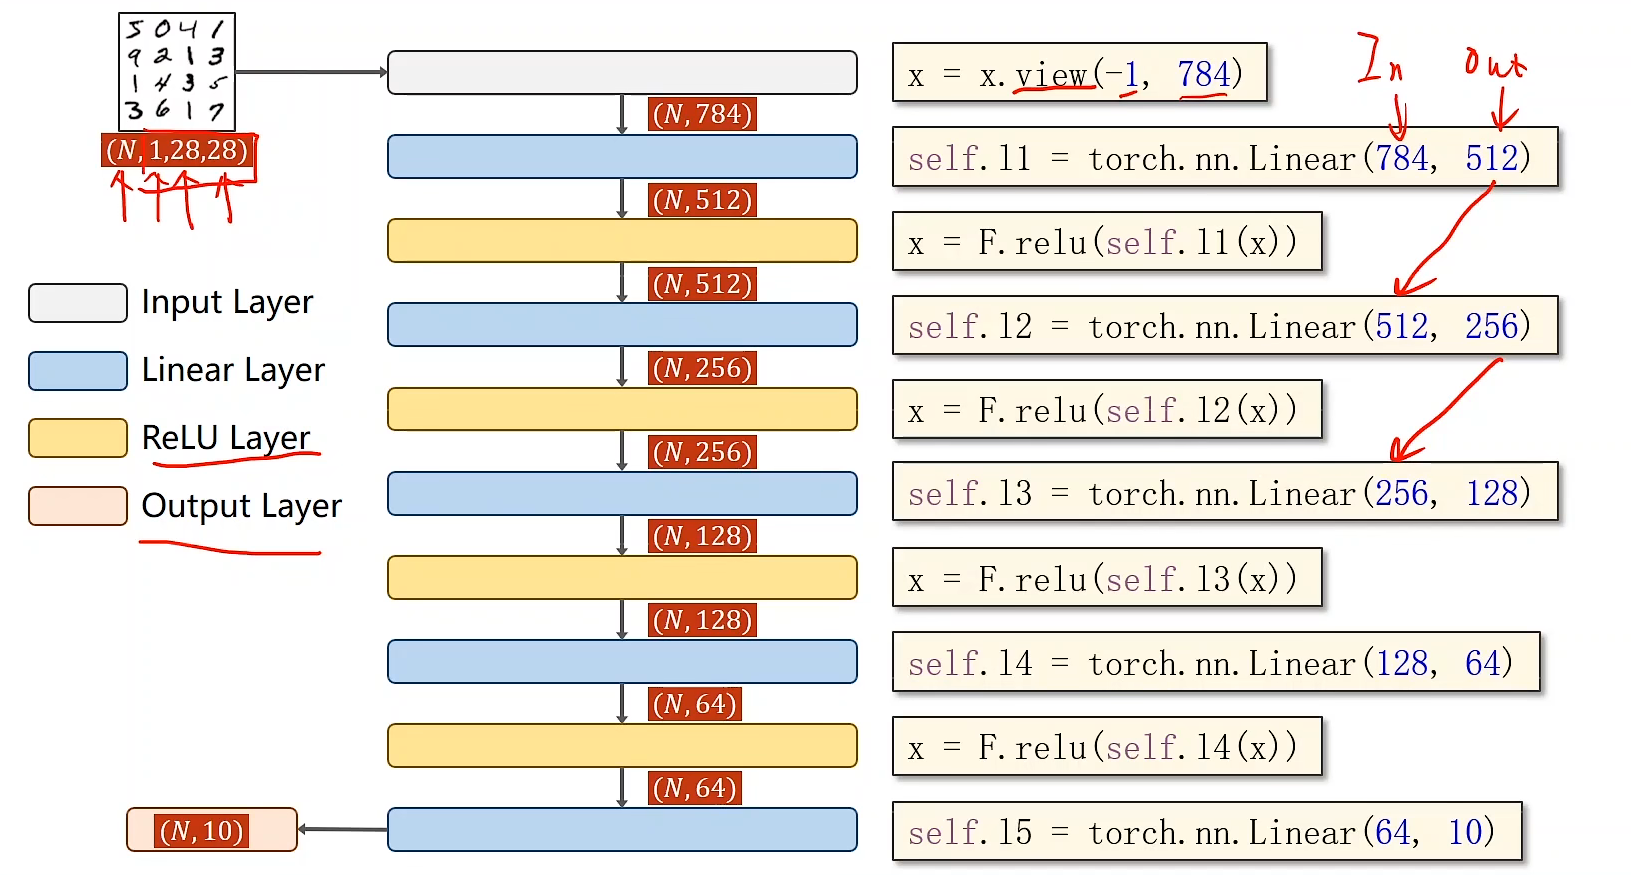

In [22]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

In [23]:
batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])  # 均值&标准差
train=datasets.MNIST(root='./data/StartData/mnist',train=True,download=True,transform=transform)
train_loader=DataLoader(train,shuffle=True,batch_size=batch_size)
test=datasets.MNIST(root='./data/StartData/mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test,shuffle=False,batch_size=batch_size)

In [24]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.l1=torch.nn.Linear(784,512)
        self.l2=torch.nn.Linear(512,256)
        self.l3=torch.nn.Linear(256,128)
        self.l4=torch.nn.Linear(128,64)
        self.l5=torch.nn.Linear(64,10)
        
    def forward(self,x):
        x=x.view(-1,784)
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=F.relu(self.l3(x))
        x=F.relu(self.l4(x))
        return self.l5(x)
    
model=Net()

In [25]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)  # 冲量momentum优化训练过程(下降很快，冲破局部极小值)

In [26]:
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,labels=data
        optimizer.zero_grad()
        
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d] loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0

In [27]:
def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            outputs=model(images)
            _,predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted==labels).sum().item()
    print('Accuracy on test set:%d %%'%(100*correct/total))

In [28]:
if __name__=='__main__':
    for epoch in range(10):
        train(epoch)
        test()

[1,  300] loss:2.192
[1,  600] loss:0.888
[1,  900] loss:0.442
Accuracy on test set:89 %
[2,  300] loss:0.318
[2,  600] loss:0.272
[2,  900] loss:0.231
Accuracy on test set:93 %
[3,  300] loss:0.187
[3,  600] loss:0.177


KeyboardInterrupt: 